## Filter feature selection


##  ReliefF

## Top-20 features: 

 ### ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Urea', 'Age', 'HGB', 'WBC', 'RBC', 'CEA']
 
 ## 78%

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="darkgrid")
sns.set_palette(palette = 'pastel')
# color palette for seaborn
cmap = sns.diverging_palette(220, 10, as_cmap=True)

from ReliefF import ReliefF




In [54]:
sns.__version__

'0.11.0'

<center> At first, let's exploring mental health in the tech industry in 2014. Then, comparing results with data from 2016 and adding data from word-happiness in 2016. </center>

# <center>Exploring mental health in the tech industry in 2014</center>

Some information about explored data:

- "*This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace*". 
- **Features:**

<table>
<thead>
<tr><th>Feature name</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>Timestamp</td><td> - </td></tr>
<tr><td>Age</td><td> - </td></tr>
<tr><td>Gender</td><td> - </td></tr>
<tr><td>Country</td><td> - </td></tr>
<tr><td>State</td><td> (only for US) </td></tr>
<tr><td>Self employed</td><td> Are you self-employed? </td></tr>
<tr><td>Family history</td><td> Family history of mental illness </td></tr>
<tr><td>Treatment</td><td>Is treatment for a mental health condition was?</td></tr>
<tr><td>Work interfere</td><td> Is mental health condition affects work? </td></tr>
<tr><td>No employees</td><td> The number of employees in your company or organization </td></tr>
<tr><td>Remote work</td><td> Having remote work (outside of an office) at least 50% of the time </td></tr>
<tr><td>Tech company</td><td> The employer is primarily a tech company/organization </td></tr>
<tr><td>Benefits</td><td> Providing mental health benefits by the employer </td></tr>
<tr><td>Care options:</td><td> Providing options for mental health care by the employer </td></tr>
<tr><td>Wellness program</td><td> Discussion about mental health as part of an employee wellness program by the employes </td></tr>
<tr><td>Seek help</td><td> Providing resources by the employer to learn more about mental health issues and how to seek help </td></tr>
<tr><td>Anonymity</td><td> Protecting anonymity if you choose to take advantage of mental health or substance abuse treatment resources</td></tr>
<tr><td>Leave</td><td> How easy is it for you to take medical leave for a mental health condition? </td></tr>
<tr><td>Mental-health consequence: </td><td>  Having negative consequences caused by discussing a mental health issue with your employer</td></tr>
<tr><td>Phys-health consequence</td><td> Having negative consequences caused by discussing a physical health issue with your employer </td></tr>
<tr><td>Coworkers</td><td> Would you be willing to discuss a mental health issue with your coworkers?</td></tr>
<tr><td>Supervisor</td><td> Would you be willing to discuss a mental health issue with your direct supervisor(s)? </td></tr>
<tr><td>Mental health interview:</td><td> Would you bring up a mental health issue with a potential employer in an interview? </td></tr>
<tr><td>Phys health interview</td><td> Would you bring up a physical health issue with a potential employer in an interview? </td></tr>
<tr><td>Mental vs Physical</td><td> Do you feel that your employer takes mental health as seriously as physical health? </td></tr>
<tr><td>Obs consequence</td><td> Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? </td></tr>
<tr><td>Comments</td><td> Any additional notes or comments </td></tr>
</tbody>
</table>






# **<center> Table of content: </center>**

**November, 2020.**

 - [Exploratory data analysis](#EDA:) 
 - [Feature Selection](##Feature-Selection:) 
 - ...
 
 
<p> <font size="3" color="red"> will be updated, if u find it useful, please upvote :) </font> </p>

# EDA:

Well, we have 27 columns (features) and 1259 rows (values - candidates, who answered the questions):

In [2]:
BC = pd.read_csv('bc_with_mis_90.csv')
BC.head(2)

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.4,1.0,2.0,1.0,124.0,69.12,8.02,3.4,4.6,13.4,500.0,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,NaN,9.6,3.0,7.0,133.0,51.82,7.91,4.4,5.0,12.5,NaN,15.0,260.0,137.8,4.18,19.1,0


Have we got any *NULL-values*? Let's plot them:

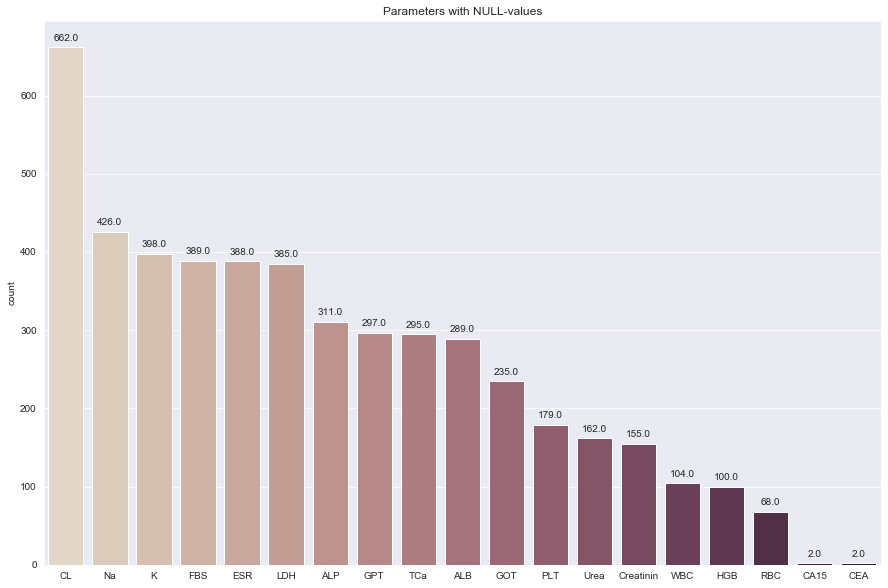

In [3]:
plt.figure(figsize=(15,10))

null_values = BC.isnull().sum().sort_values(ascending=False).to_frame()
null_values = null_values.loc[null_values[0] != 0]
ax = sns.barplot(x=null_values.index, y=null_values[0], data=null_values,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
ax = ax.set(ylabel="count", title='Parameters with NULL-values')

In [4]:

#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.0,23.0,0.8,3.400000,1.0,2.0,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,400.0,22.0,0.7,4.461508,9.6,3.0,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,450.0,27.0,0.6,3.500000,9.3,11.0,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.0,15.0,1.1,4.200000,8.5,13.0,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.0,2.0,1.0,3.000000,8.0,7.0,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.0,28.0,0.7,5.900000,9.5,63.0,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.0,32.0,0.8,10.200000,8.8,82.0,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.0,15.0,0.6,11.400000,8.1,22.0,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.0,29.0,0.9,10.900000,8.2,51.0,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


In [6]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())

BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())


In [7]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
TCa                  0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_TCa           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [8]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan


BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [9]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)


In [10]:
BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          50
Urea         66
Creatinin    27
ALB          60
TCa           8
GPT          61
GOT          43
ALP          28
CA15          3
CEA           1
WBC          13
RBC           4
HGB           3
PLT           3
ESR          30
LDH          12
Na            1
K             8
CL            3
CLASS         0
dtype: int64

In [11]:

#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,ALP,CA15,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,200.00000,23.0,0.8,3.400000,1.0,2.000000,1.0,124.000000,69.120000,8.020000,3.4,4.60,13.4,500.000000,25.0,150.0,145.0,4.50,19.1,0
1,1,53,Sabha,154.36173,22.0,0.7,4.461508,9.6,3.000000,7.0,133.000000,51.820000,7.910000,4.4,5.00,12.5,283.554362,15.0,260.0,137.8,4.18,19.1,0
2,1,50,Sabha,154.36173,27.0,0.6,3.500000,9.3,11.000000,17.0,155.000000,50.000000,8.740000,5.1,4.46,12.5,456.000000,2.0,169.0,139.2,4.17,16.4,0
3,1,36,Obaree-center,300.00000,15.0,1.1,4.200000,8.5,13.000000,1.0,140.701195,40.110000,10.340000,3.1,4.33,13.8,600.000000,15.0,138.0,14.0,4.00,1.1,0
4,1,30,Obaree-center,345.00000,2.0,1.0,3.000000,8.0,7.000000,13.0,125.000000,67.630000,7.310000,4.2,4.13,1.7,543.000000,25.0,154.0,136.4,4.60,17.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1,30,Algatroon,70.00000,28.0,0.7,5.900000,9.5,13.882247,23.0,234.000000,21.000000,1.120000,3.9,5.23,11.3,288.000000,15.0,254.0,138.7,4.35,103.6,1
2433,1,47,Sabha,98.00000,32.0,0.8,10.200000,8.8,13.882247,23.0,190.000000,21.370000,2.020000,4.8,4.57,13.2,249.000000,12.0,254.0,142.3,4.40,102.7,1
2434,1,43,Sabha,76.00000,15.0,0.6,11.400000,8.1,22.000000,15.0,143.000000,8.500000,0.500000,4.4,4.32,11.1,249.000000,8.0,254.0,137.8,4.25,110.2,1
2435,1,60,Sabha,120.00000,29.0,0.9,10.900000,8.2,51.000000,17.0,104.000000,30.967314,4.536407,4.5,4.41,12.9,293.000000,13.0,254.0,147.5,3.15,107.5,1


## Encoding features

All of the questions have categorical answers.

In the future, we could use categorical encoding for them. I use OrdinalEncoder for all columns with the exception of 'Timestamp', 'comments', 'Age'.

 #!pip install category_encoders


from category_encoders.ordinal import OrdinalEncoder

data_encoding = data
encoder = OrdinalEncoder()
data_encoding = encoder.fit_transform(data, axis=1)

# new DataFrame
#data_encoding['Age'] = data.Age
data_encoding

In [12]:
# LabelEncoder for object featurs

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


# Feature Selection:

Trying different approaches  and comparing results:

- ReliefF.

## Relief

This method samples randomly instances from the dataset and updates the relevance of each feature based on the difference between the selected instance and the two nearest instances of the same and opposite classes. If a feature difference is observed in the neighboring instances of the same class ( a ‘hit’), the feature score decreases, alternatively if the feature value difference is observed with a different score (a ‘miss’) then the feature score increases.

![](https://miro.medium.com/max/472/1*EjkXuRcsUqQyQ-sw8uCM8w.png)

The extended algorithm, ReliefF applies feature weighting and searches for more nearest neighbors.

In [7]:
#! pip install ReliefF

In [13]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 2)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

## تدريب النموذج علي أفضل 2 سمة بعد معالجة القيم المفقودة


In [14]:
columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-2 features: \n', reliefF_features)

Top-2 features: 
 ['Sex', 'Adress']


In [15]:

X=BC.drop(["CLASS","Age","FBS","Urea","Creatinin","CA15","CEA","ALB","TCa","GPT","GOT","ALP","WBC","RBC","PLT","ESR","LDH","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


In [16]:
X.shape,Y.shape



((2437, 2), (2437,))

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



0.6305418719211823

In [18]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.6524590163934426

In [19]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.4479528503247807
mean_squared_error is = 0.4734025145439847


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.6305418719211823
Decision Tree classifier Testing Accurcy =  0.6524590163934426
[[262  90]
 [122 136]]


Text(34.0, 0.5, 'Acutl')

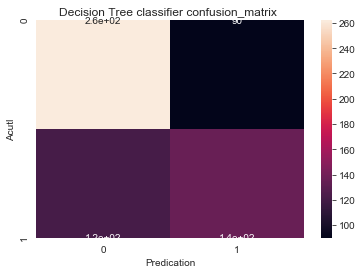

In [20]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [21]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       352
           1       0.60      0.52      0.55       258

    accuracy                           0.65       610
   macro avg       0.64      0.63      0.63       610
weighted avg       0.64      0.65      0.64       610

accuracy_score= 0.6475409836065574


## تدريب النموذج علي أفضل 3 سمة بعد معالجة القيم المفقودة


In [22]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 3)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-3 features: \n', reliefF_features)

Top-3 features: 
 ['Sex', 'Adress', 'LDH']


In [23]:



X=BC.drop(["CLASS","Age","FBS","Urea","Creatinin","CA15","CEA","ALB","TCa","GPT","GOT","ALP","WBC","RBC","PLT","ESR","K","Na","CL","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 3)

In [24]:
X.shape,Y.shape



((2437, 3), (2437,))

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



0.8067870826491517

In [26]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7032786885245902

In [27]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.34749085514455963
mean_squared_error is = 0.47871446571324444


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.8067870826491517
Decision Tree classifier Testing Accurcy =  0.7032786885245902
[[233 102]
 [ 79 196]]


Text(34.0, 0.5, 'Acutl')

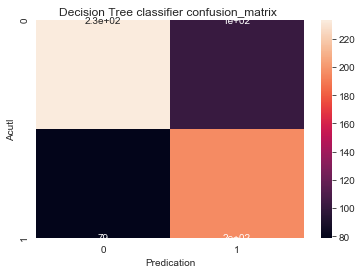

In [28]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [29]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       335
           1       0.67      0.63      0.65       275

    accuracy                           0.70       610
   macro avg       0.69      0.69      0.69       610
weighted avg       0.69      0.70      0.69       610

accuracy_score= 0.6950819672131148


## تدريب النموذج علي أفضل 4 سمة بعد معالجة القيم المفقودة


In [30]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 4)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-4 features: \n', reliefF_features)

Top-4 features: 
 ['Sex', 'Adress', 'LDH', 'CL']


In [31]:



X=BC.drop(["CLASS","Age","FBS","Urea","Creatinin","CA15","CEA","ALB","TCa","GPT","GOT","ALP","WBC","RBC","PLT","ESR","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 4)

In [32]:
X.shape,Y.shape



((2437, 4), (2437,))

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



0.9507389162561576

In [34]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.6721311475409836

In [35]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.3343217893217893
mean_squared_error is = 0.5547793902827401


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9507389162561576
Decision Tree classifier Testing Accurcy =  0.6721311475409836
[[225 123]
 [ 77 185]]


Text(34.0, 0.5, 'Acutl')

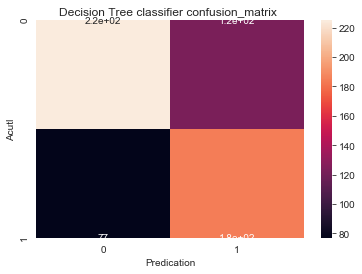

In [36]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [37]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       348
           1       0.62      0.68      0.65       262

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.69      0.68      0.68       610

accuracy_score= 0.6819672131147541


## تدريب النموذج علي أفضل5 سمة بعد معالجة القيم المفقودة


In [38]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 5)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-5 features: \n', reliefF_features)

Top-5 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin']


In [39]:



X=BC.drop(["CLASS","Age","FBS","Urea","CA15","CEA","ALB","TCa","GPT","GOT","ALP","WBC","RBC","PLT","ESR","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 5)

In [40]:
X.shape,Y.shape



((2437, 5), (2437,))

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



0.9835796387520526

In [42]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.6540983606557377

In [43]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.34970530835284935
mean_squared_error is = 0.5855726050057705


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 0.9835796387520526
Decision Tree classifier Testing Accurcy =  0.6540983606557377
[[229 111]
 [100 170]]


Text(34.0, 0.5, 'Acutl')

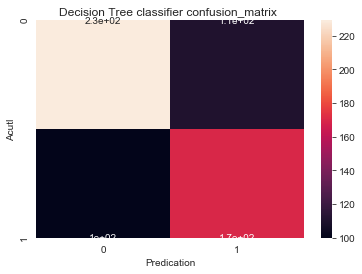

In [44]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [45]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       340
           1       0.61      0.62      0.62       270

    accuracy                           0.66       610
   macro avg       0.65      0.65      0.65       610
weighted avg       0.66      0.66      0.66       610

accuracy_score= 0.6573770491803279


## تدريب النموذج علي أفضل 6 سمة بعد معالجة القيم المفقودة


In [46]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 6)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-6 features: \n', reliefF_features)

Top-6 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS']


In [47]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","ALB","TCa","GPT","GOT","ALP","WBC","RBC","PLT","ESR","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 6)

In [48]:
X.shape,Y.shape



((2437, 6), (2437,))

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [50]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7344262295081967

In [51]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.26557377049180325
mean_squared_error is = 0.5153385008824813


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7344262295081967
[[256  93]
 [ 69 192]]


Text(34.0, 0.5, 'Acutl')

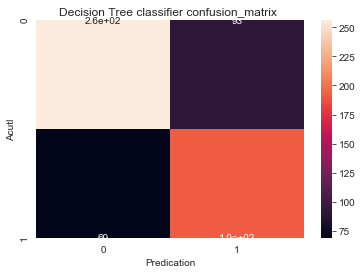

In [52]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [53]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       349
           1       0.67      0.74      0.70       261

    accuracy                           0.73       610
   macro avg       0.73      0.73      0.73       610
weighted avg       0.74      0.73      0.74       610

accuracy_score= 0.7344262295081967


## تدريب النموذج علي أفضل7 سمة بعد معالجة القيم المفقودة


In [54]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 7)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-7 features: \n', reliefF_features)

Top-7 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR']


In [55]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","ALB","TCa","GPT","GOT","ALP","WBC","RBC","PLT","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 7)

In [56]:
X.shape,Y.shape



((2437, 7), (2437,))

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [58]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7508196721311475

In [59]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.24918032786885247
mean_squared_error is = 0.49917965490277394


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7508196721311475
[[265  80]
 [ 72 193]]


Text(34.0, 0.5, 'Acutl')

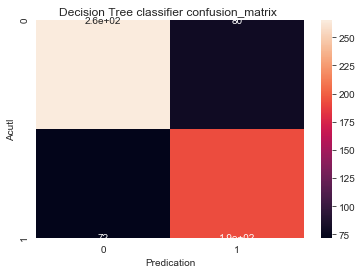

In [60]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [61]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       345
           1       0.71      0.73      0.72       265

    accuracy                           0.75       610
   macro avg       0.75      0.75      0.75       610
weighted avg       0.75      0.75      0.75       610

accuracy_score= 0.7508196721311475


## تدريب النموذج علي أفضل 8 سمة بعد معالجة القيم المفقودة


In [62]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 8)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-8 features: \n', reliefF_features)

Top-8 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT']


In [63]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","ALB","TCa","GOT","ALP","WBC","RBC","PLT","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 8)

In [64]:
X.shape,Y.shape



((2437, 8), (2437,))

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [66]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7311475409836066

In [67]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.26885245901639343
mean_squared_error is = 0.5185098446668042


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7311475409836066
[[255  77]
 [ 87 191]]


Text(34.0, 0.5, 'Acutl')

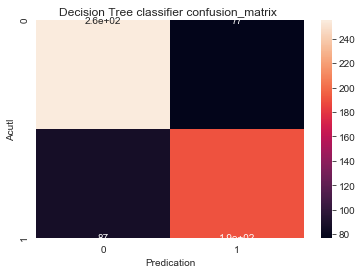

In [68]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [69]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       332
           1       0.71      0.69      0.70       278

    accuracy                           0.73       610
   macro avg       0.73      0.73      0.73       610
weighted avg       0.73      0.73      0.73       610

accuracy_score= 0.7311475409836066


## تدريب النموذج علي أفضل 9 سمة بعد معالجة القيم المفقودة


In [70]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 9)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-9 features: \n', reliefF_features)

Top-9 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP']


In [71]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","ALB","TCa","GOT","WBC","RBC","PLT","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 9)

In [72]:
X.shape,Y.shape



((2437, 9), (2437,))

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [74]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7278688524590164

In [75]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.2721311475409836
mean_squared_error is = 0.5216619092295158


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7278688524590164
[[259 100]
 [ 66 185]]


Text(34.0, 0.5, 'Acutl')

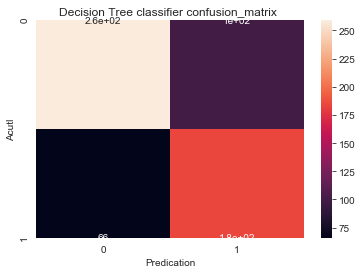

In [76]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [77]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       359
           1       0.65      0.74      0.69       251

    accuracy                           0.73       610
   macro avg       0.72      0.73      0.72       610
weighted avg       0.74      0.73      0.73       610

accuracy_score= 0.7278688524590164


## تدريب النموذج علي أفضل 10 سمة بعد معالجة القيم المفقودة


In [79]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 10)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-10 features: \n', reliefF_features)

Top-10 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT']


In [80]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","ALB","TCa","WBC","RBC","PLT","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 10)

In [81]:
X.shape,Y.shape



((2437, 10), (2437,))

In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [83]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7245901639344262

In [84]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.2754098360655738
mean_squared_error is = 0.5247950419597862


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7245901639344262
[[250  84]
 [ 84 192]]


Text(34.0, 0.5, 'Acutl')

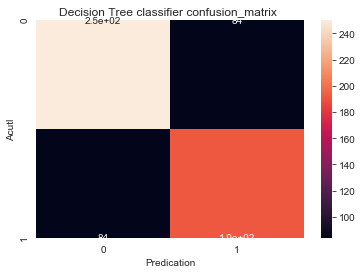

In [85]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [86]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       334
           1       0.70      0.70      0.70       276

    accuracy                           0.72       610
   macro avg       0.72      0.72      0.72       610
weighted avg       0.72      0.72      0.72       610

accuracy_score= 0.7245901639344262


## تدريب النموذج علي أفضل11  سمة بعد معالجة القيم المفقودة


In [87]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 11)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-11 features: \n', reliefF_features)

Top-11 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB']


In [88]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","TCa","WBC","RBC","PLT","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 11)

In [89]:
X.shape,Y.shape



((2437, 11), (2437,))

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [91]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7147540983606557

In [92]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.28524590163934427
mean_squared_error is = 0.5340841709312721


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7147540983606557
[[243  91]
 [ 83 193]]


Text(34.0, 0.5, 'Acutl')

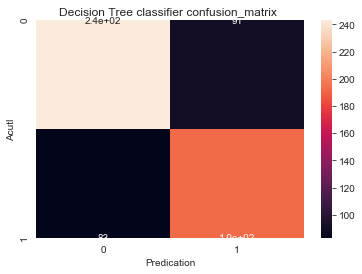

In [93]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [94]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       334
           1       0.68      0.70      0.69       276

    accuracy                           0.71       610
   macro avg       0.71      0.71      0.71       610
weighted avg       0.72      0.71      0.72       610

accuracy_score= 0.7147540983606557


## تدريب النموذج علي أفضل 12 سمة بعد معالجة القيم المفقودة


In [95]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 12)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-12 features: \n', reliefF_features)

Top-12 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa']


In [96]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","WBC","RBC","PLT","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 12)

In [97]:
X.shape,Y.shape



((2437, 12), (2437,))

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [99]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7245901639344262

In [100]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.2754098360655738
mean_squared_error is = 0.5247950419597862


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7245901639344262
[[267  89]
 [ 79 175]]


Text(34.0, 0.5, 'Acutl')

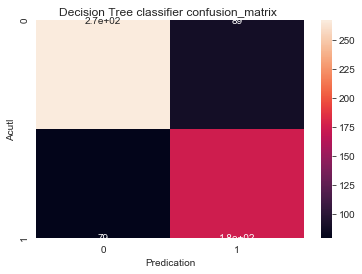

In [101]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [102]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       356
           1       0.66      0.69      0.68       254

    accuracy                           0.72       610
   macro avg       0.72      0.72      0.72       610
weighted avg       0.73      0.72      0.73       610

accuracy_score= 0.7245901639344262


## تدريب النموذج علي أفضل 13 سمة بعد معالجة القيم المفقودة


In [103]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 13)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-13 features: \n', reliefF_features)

Top-13 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT']


In [104]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","WBC","RBC","K","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 13)

In [105]:
X.shape,Y.shape



((2437, 13), (2437,))

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [107]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7672131147540984

In [108]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.23278688524590163
mean_squared_error is = 0.48247993247999615


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7672131147540984
[[284  65]
 [ 77 184]]


Text(34.0, 0.5, 'Acutl')

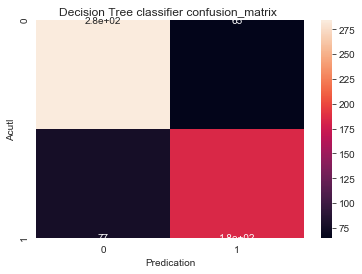

In [109]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [110]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       349
           1       0.74      0.70      0.72       261

    accuracy                           0.77       610
   macro avg       0.76      0.76      0.76       610
weighted avg       0.77      0.77      0.77       610

accuracy_score= 0.7672131147540984


## تدريب النموذج علي أفضل 15 سمة بعد معالجة القيم المفقودة


In [111]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 15)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-15 features: \n', reliefF_features)

Top-15 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Na', 'K']


In [112]:



X=BC.drop(["CLASS","Age","Urea","CA15","CEA","WBC","RBC","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 14)

In [113]:
X.shape,Y.shape



((2437, 14), (2437,))

In [114]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [115]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7524590163934426

In [116]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.24754098360655738
mean_squared_error is = 0.4975349069226775


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7524590163934426
[[259  76]
 [ 75 200]]


Text(34.0, 0.5, 'Acutl')

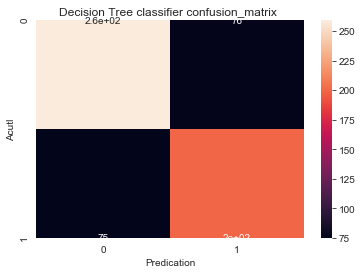

In [117]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [118]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       335
           1       0.72      0.73      0.73       275

    accuracy                           0.75       610
   macro avg       0.75      0.75      0.75       610
weighted avg       0.75      0.75      0.75       610

accuracy_score= 0.7524590163934426


## تدريب النموذج علي أفضل16 سمة بعد معالجة القيم المفقودة


In [119]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 16)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-16 features: \n', reliefF_features)

Top-16 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Na', 'K', 'Urea']


In [120]:



X=BC.drop(["CLASS","Age","CA15","CEA","WBC","RBC","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 15)

In [121]:
X.shape,Y.shape



((2437, 15), (2437,))

In [122]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [123]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7426229508196721

In [124]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.2573770491803279
mean_squared_error is = 0.5073234167474707


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7426229508196721
[[260  91]
 [ 66 193]]


Text(34.0, 0.5, 'Acutl')

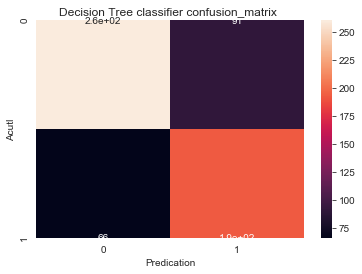

In [125]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [126]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       351
           1       0.68      0.75      0.71       259

    accuracy                           0.74       610
   macro avg       0.74      0.74      0.74       610
weighted avg       0.75      0.74      0.74       610

accuracy_score= 0.7426229508196721


## تدريب النموذج علي أفضل 17 سمة بعد معالجة القيم المفقودة


In [127]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 17)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-17 features: \n', reliefF_features)

Top-17 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Na', 'K', 'Urea', 'Age']


In [128]:



X=BC.drop(["CLASS","CA15","CEA","WBC","RBC","Na","HGB"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 16)

In [129]:
X.shape,Y.shape



((2437, 16), (2437,))

In [130]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [131]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7229508196721312

In [132]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.27704918032786885
mean_squared_error is = 0.5263546146162954


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7229508196721312
[[254  83]
 [ 86 187]]


Text(34.0, 0.5, 'Acutl')

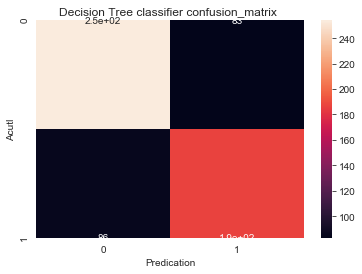

In [133]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [134]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       337
           1       0.69      0.68      0.69       273

    accuracy                           0.72       610
   macro avg       0.72      0.72      0.72       610
weighted avg       0.72      0.72      0.72       610

accuracy_score= 0.7229508196721312


## تدريب النموذج علي أفضل 18 سمة بعد معالجة القيم المفقودة


In [135]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 18)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-18 features: \n', reliefF_features)

Top-18 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Na', 'K', 'Urea', 'Age', 'HGB']


In [137]:



X=BC.drop(["CLASS","CA15","CEA","WBC","RBC"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 18)

In [138]:
X.shape,Y.shape



((2437, 18), (2437,))

In [139]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [140]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7557377049180328

In [141]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.2442622950819672
mean_squared_error is = 0.4942289905316838


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7557377049180328
[[265  84]
 [ 65 196]]


Text(34.0, 0.5, 'Acutl')

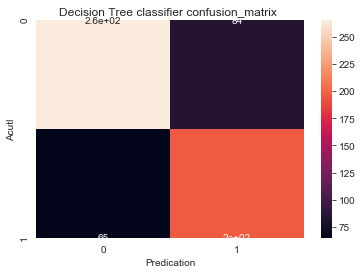

In [142]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [143]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       349
           1       0.70      0.75      0.72       261

    accuracy                           0.76       610
   macro avg       0.75      0.76      0.75       610
weighted avg       0.76      0.76      0.76       610

accuracy_score= 0.7557377049180328


## تدريب النموذج علي أفضل 19 سمة بعد معالجة القيم المفقودة


In [144]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 19)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-19 features: \n', reliefF_features)

Top-19 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Na', 'K', 'Urea', 'Age', 'HGB', 'WBC']


In [146]:



X=BC.drop(["CLASS","CA15","CEA","RBC"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 19)

In [147]:
X.shape,Y.shape



((2437, 19), (2437,))

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [149]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.759016393442623

In [150]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.24098360655737705
mean_squared_error is = 0.4909008113227937


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.759016393442623
[[280  59]
 [ 88 183]]


Text(34.0, 0.5, 'Acutl')

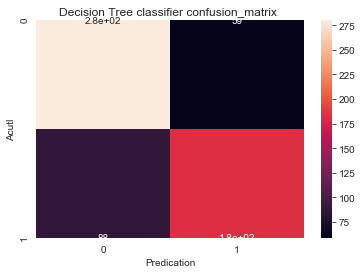

In [151]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [152]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       339
           1       0.76      0.68      0.71       271

    accuracy                           0.76       610
   macro avg       0.76      0.75      0.75       610
weighted avg       0.76      0.76      0.76       610

accuracy_score= 0.759016393442623


## تدريب النموذج علي أفضل 20 سمة بعد معالجة القيم المفقودة


In [153]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 20)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-20 features: \n', reliefF_features)

Top-20 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Na', 'K', 'Urea', 'Age', 'HGB', 'WBC', 'RBC']


In [154]:



X=BC.drop(["CLASS","CA15","CEA"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 20)

In [155]:
X.shape,Y.shape



((2437, 20), (2437,))

In [156]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [157]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.7819672131147541

In [158]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.2180327868852459
mean_squared_error is = 0.46693981077355773


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.7819672131147541
[[269  61]
 [ 72 208]]


Text(34.0, 0.5, 'Acutl')

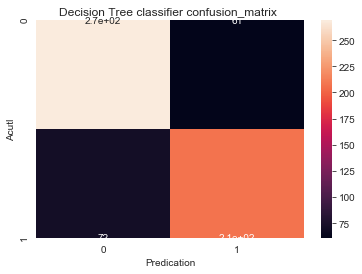

In [159]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [160]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       330
           1       0.77      0.74      0.76       280

    accuracy                           0.78       610
   macro avg       0.78      0.78      0.78       610
weighted avg       0.78      0.78      0.78       610

accuracy_score= 0.7819672131147541


## تدريب النموذج علي أفضل 21 سمة بعد معالجة القيم المفقودة


In [161]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 21)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-21 features: \n', reliefF_features)

Top-21 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Na', 'K', 'Urea', 'Age', 'HGB', 'WBC', 'RBC', 'CEA']


In [162]:



X=BC.drop(["CLASS","CA15"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 21)

In [163]:
X.shape,Y.shape



((2437, 21), (2437,))

In [164]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [165]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8803278688524591

In [166]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.11967213114754098
mean_squared_error is = 0.3459365998959072


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8803278688524591
[[301  30]
 [ 43 236]]


Text(34.0, 0.5, 'Acutl')

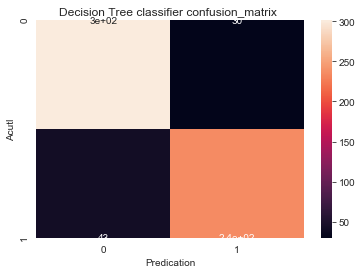

In [167]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [168]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       331
           1       0.89      0.85      0.87       279

    accuracy                           0.88       610
   macro avg       0.88      0.88      0.88       610
weighted avg       0.88      0.88      0.88       610

accuracy_score= 0.8803278688524591


## تدريب النموذج علي أفضل 22 سمة بعد معالجة القيم المفقودة


In [169]:

fs = ReliefF(n_neighbors=1, n_features_to_keep= 22)
features = fs.fit_transform(BC.drop(['CLASS'], axis=1).to_numpy(), BC['CLASS'].to_numpy()).T

columns = BC.drop(['CLASS'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (BC.drop(['CLASS'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-22 features: \n', reliefF_features)

Top-22 features: 
 ['Sex', 'Adress', 'LDH', 'CL', 'Creatinin', 'FBS', 'ESR', 'GPT', 'ALP', 'GOT', 'ALB', 'TCa', 'PLT', 'Na', 'K', 'Urea', 'Age', 'HGB', 'WBC', 'RBC', 'CEA', 'CA15']


In [172]:



X=BC.drop(["CLASS"],axis=1)
Y=BC["CLASS"] 


X.shape


(2437, 22)

In [173]:
X.shape,Y.shape



((2437, 22), (2437,))

In [174]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(x_train,y_train) 
D_classifier.score(x_train,y_train)



1.0

In [175]:
y_pred=D_classifier.predict_proba(x_test)[:,1]


new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)



0.8737704918032787

In [176]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.12622950819672132
mean_squared_error is = 0.35528792295365363


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8737704918032787
[[300  36]
 [ 41 233]]


Text(34.0, 0.5, 'Acutl')

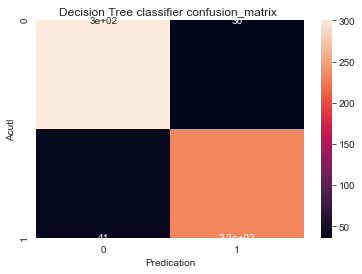

In [177]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(x_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [178]:

### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(x_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       336
           1       0.87      0.85      0.86       274

    accuracy                           0.87       610
   macro avg       0.87      0.87      0.87       610
weighted avg       0.87      0.87      0.87       610

accuracy_score= 0.8737704918032787


In [179]:
No_best_Fs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
validation_accuracy = [65,
                       70,
                       67,
                       65,
                       73,
                       75,
                       73,
                       72,
                       72,
                       71,
                       72,
                       76,
                       75,
                       74,
                       72,
                       75,
                       75,
                       78,
                       88,
                       87]
List = zip(No_best_Fs,validation_accuracy)
df = pd.DataFrame(data = List, columns=['No_best_Fs','validation_accuracy'],)
df


,No_best_Fs,validation_accuracy
0,2,65
1,3,70
2,4,67
3,5,65
4,6,73
5,7,75
6,8,73
7,9,72
8,10,72
9,11,71


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bst'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


the best fretures number by ReliefF are 20:
Sex,Adress, LDH, CL,Creatinin, FBS, ESR, GPT, ALP, GOT, ALB, TCa, PLT, Na, K, Urea, Age, HGB, WBC, RBC, CEA


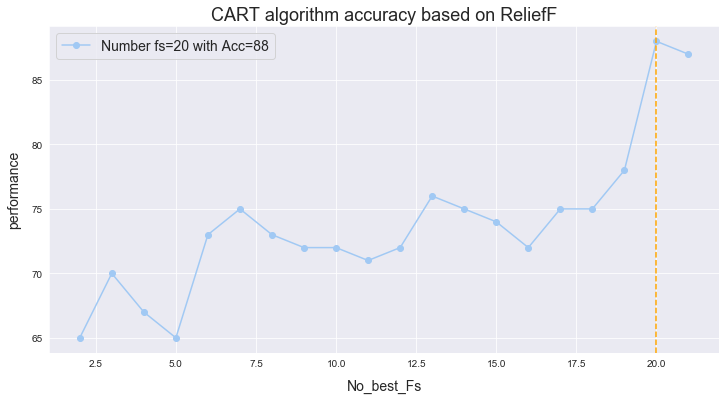

In [182]:
plt.figure(figsize=(12,6))
plt.plot(df['No_best_Fs'],df['validation_accuracy'],label='Number fs=20 with Acc=88',marker='o')

plt.title("CART algorithm accuracy based on ReliefF",fontsize=18)
plt.axvline(x=20, color='orange', linestyle='--')
plt.xlabel('No_best_Fs',labelpad=10, fontsize=14)
plt.ylabel('performance',labelpad=10, fontsize=14)
plt.legend(bbox_to_anchor=(1,1),fontsize=14)
plt.legend(loc='bst',fontsize=14)

print("the best fretures number by ReliefF are 20:")
print("Sex,Adress, LDH, CL,Creatinin, FBS, ESR, GPT, ALP, GOT, ALB, TCa, PLT, Na, K, Urea, Age, HGB, WBC, RBC, CEA")
plt.show()